In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split    
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Data Import

In [2]:
url = 'https://introtomlsampledata.blob.core.windows.net/data/nyc-taxi/nyc-taxi-sample-data.csv'
raw_data = pd.read_csv(url)
raw_data

,vendorID,passengerCount,tripDistance,hour_of_day,day_of_week,day_of_month,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
0,1,1,9.40,15,2,27,1,None,False,29.058824,24.0,3.0,6.185714,44.30
1,2,5,14.75,13,4,15,1,None,False,0.000000,6.0,0.0,4.571930,44.80
2,2,1,3.35,23,4,8,1,None,False,0.000000,1.0,0.0,4.384091,18.96
3,2,1,3.33,18,2,27,1,None,False,29.058824,24.0,3.0,6.185714,16.30
4,2,1,0.47,17,6,3,1,None,False,0.000000,1.0,0.0,3.846429,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11729,2,1,7.47,13,2,22,6,None,False,0.000000,1.0,0.0,25.704425,35.81
11730,2,1,3.76,0,3,16,6,None,False,0.000000,24.0,51.0,21.695868,16.30
11731,2,1,3.45,14,5,4,6,None,False,0.000000,24.0,41.0,21.990441,14.30
11732,1,1,20.20,1,6,19,6,None,False,0.000000,1.0,0.0,23.116071,68.15


In [3]:
#info regarding dataset (total no. of columns, rows and their respective datatypes) 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11734 entries, 0 to 11733
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vendorID              11734 non-null  int64  
 1   passengerCount        11734 non-null  int64  
 2   tripDistance          11734 non-null  float64
 3   hour_of_day           11734 non-null  int64  
 4   day_of_week           11734 non-null  int64  
 5   day_of_month          11734 non-null  int64  
 6   month_num             11734 non-null  int64  
 7   normalizeHolidayName  11734 non-null  object 
 8   isPaidTimeOff         11734 non-null  bool   
 9   snowDepth             11734 non-null  float64
 10  precipTime            11734 non-null  float64
 11  precipDepth           11734 non-null  float64
 12  temperature           11734 non-null  float64
 13  totalAmount           11734 non-null  float64
dtypes: bool(1), float64(6), int64(6), object(1)
memory usage: 1.2+ MB


## Data Preparation

In [6]:
#Drop categorical variables 
data = raw_data.select_dtypes(exclude = 'object')

In [7]:
#separate target from predictors
y = round(data['totalAmount'],0) #Target #SelectFromModel doesnt accept continuous Targets so round to int
X = data.drop('totalAmount', axis=1)#Predictors

In [8]:
#Select the features from the train set and then transfer the changes to the test set later.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Train a model using All predictors

In [10]:
# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
# Train the classifier
rfc.fit(X_train, y_train)

('vendorID', 0.0358266014900053)
('passengerCount', 0.03681537145975269)
('tripDistance', 0.3699341792967585)
('hour_of_day', 0.189608489446079)
('day_of_week', 0.058978535431663655)
('day_of_month', 0.08491278148851807)
('month_num', 0.04453088266561913)
('isPaidTimeOff', 0.002067138048768141)
('snowDepth', 0.012702257762409899)
('precipTime', 0.02490860642624006)
('precipDepth', 0.048490848067996375)
('temperature', 0.09122430841618906)


## Feature Importance

('vendorID', 0.0358266014900053)
('passengerCount', 0.03681537145975269)
('tripDistance', 0.3699341792967585)
('hour_of_day', 0.189608489446079)
('day_of_week', 0.058978535431663655)
('day_of_month', 0.08491278148851807)
('month_num', 0.04453088266561913)
('isPaidTimeOff', 0.002067138048768141)
('snowDepth', 0.012702257762409899)
('precipTime', 0.02490860642624006)
('precipDepth', 0.048490848067996375)
('temperature', 0.09122430841618906)


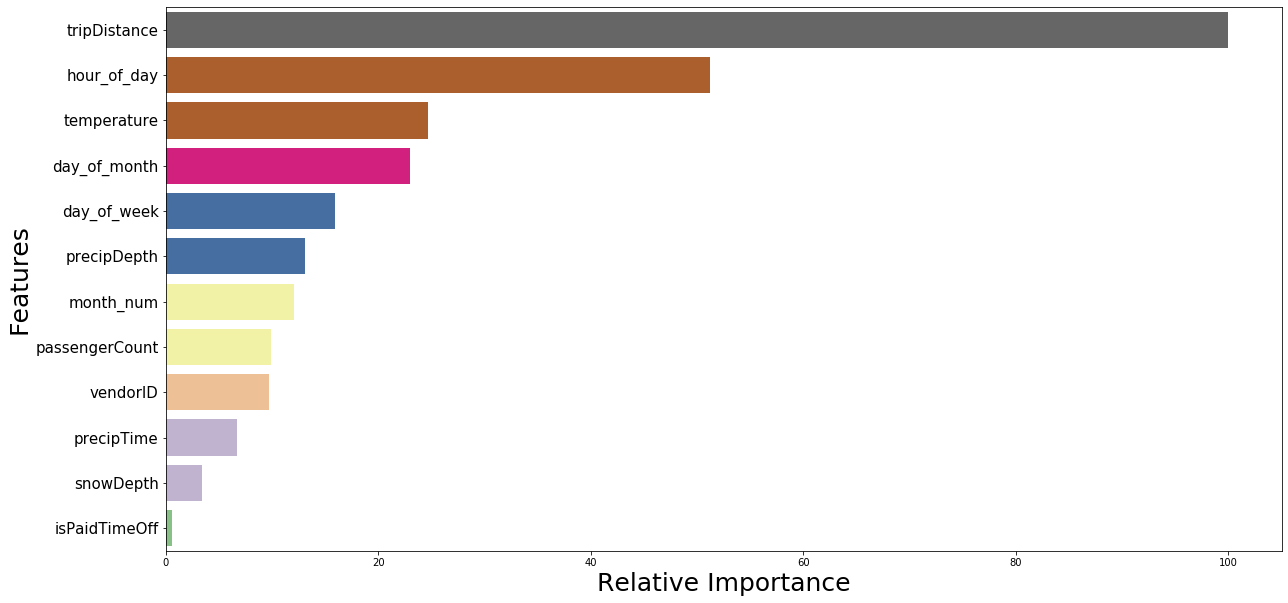

In [18]:
# Print the name and gini importance of each feature
for feature in zip(X_train.columns, rfc.feature_importances_):
    print(feature)

#Plot feature importance
import seaborn as sns
feature_imp_RF = rfc.feature_importances_

#relative feature importance  
rel_feature_imp = 100 * (feature_imp_RF / max(feature_imp_RF)) 
rel_feature_imp = pd.DataFrame({'features':list(X_train.columns),
                                'rel_importance':rel_feature_imp })

rel_feature_imp = rel_feature_imp.sort_values('rel_importance', ascending=False)

plt.figure(figsize=[20,10])
plt.yticks(fontsize=15)
ax = sns.barplot(x="rel_importance", y="features",
                 data=rel_feature_imp,
                 palette="Accent_r")

plt.xlabel("Relative Importance", fontsize=25)
plt.ylabel("Features", fontsize=25)
plt.show()

## Predict and check performance

In [ ]:
#Create function to score dataset
def score_dataset(y_test, y_pred):
    print('Mean absolute error: {0:.2f}'.format(mean_absolute_error(y_test, y_pred)))
    print('Mean squared error: {0:.2f}'.format(mean_squared_error(y_test, y_pred)))
    print('Root Mean Square Error: {0:.2f}'.format(np.sqrt(mean_absolute_error(y_test, y_pred))))


In [11]:
#Predict and check Performance
y_pred = rfc.predict(X_test)
print('Performance using default dataset')
score_dataset(y_test, y_pred)

Performance using default dataset
Mean absolute error: 3.37
Mean squared error: 54.69
Root Mean Square Error: 1.84


## USE RANDOM FOREST TO SELECT FEATURES

In [12]:
# Create a selector object that will use the random forest classifier to identify Important features.
# set threshold to value of 0.20 for features that have an importance of more than 0.20
sfm = SelectFromModel(rfc, threshold='mean')

# Train the selector
sfm.fit(X_train, y_train)

#Use get_support method on the fitted model to see which features are important
sfm.get_support()

#To see threshold used
print('Mean Threshold Used: {0}'.format(sfm.threshold_))

# Print the names of the most important features
important_features = X_train.columns[sfm.get_support()]
                                    
print('{0} important features were selected'.format(len(important_features)))
important_features

Mean Threshold Used: 0.08333333333333333
4 important features were selected


Index(['tripDistance', 'hour_of_day', 'day_of_month', 'temperature'], dtype='object')

## Train model using only important features selected

In [14]:
# Create a random forest classifier
rfc_default = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
# Train the classifier using important features
rfc_default.fit(X_train[important_features], y_train)


## Predict and Check Performance

In [15]:
# Apply The Full Featured Classifier To The Test Data
y_pred = rfc_default.predict(X_test[important_features]) 
print('Performance using Important dataset')
score_dataset(y_test, y_pred) 

Performance using Important dataset
Mean absolute error: 2.74
Mean squared error: 29.27
Root Mean Square Error: 1.65


## Comments

Just for a small cost int Performance, we have reduced our features
#This method is useful when dealing with So many features and we need to select the Best of the lot
#Remember, you can Increase or decrease the threshold to select more or fewer important features
